<a href="https://colab.research.google.com/github/alimoradi296/DeepLearning/blob/cnn/TLFlowersMoblienet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random



In [3]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow_hub as hub

#IMPORT FLOWERDATASET

In [10]:
flowers_data_url = tf.keras.utils.get_file(
  'flower_photos','httBps://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [11]:
image_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
flowers_data=image_generator.flow_from_directory(str(flowers_data_url),target_size=(224,224),batch_size=64,shuffle=True)

Found 3670 images belonging to 5 classes.


In [14]:
for flowers_data_input_batch, flowers_data_label_batch in flowers_data:
  print("Image batch shape: ", flowers_data_input_batch.shape)
  print("Label batch shape: ", flowers_data_label_batch.shape)
  break

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 5)


#APPLY TRANSFER LEARNING AND RETRAIN THE MODEL

In [8]:
mobilenet_feature_extractore_url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"

In [9]:
mobilenet_feature_extractor_layer=hub.KerasLayer(mobilenet_feature_extractore_url,input_shape=(224,224,3))

In [15]:
feature_batch=mobilenet_feature_extractor_layer(flowers_data_input_batch)
print(feature_batch.shape)

(64, 1280)


In [17]:
mobilenet_feature_extractor_layer.trainable=False

In [18]:
flowers_data.num_classes

5

In [20]:
model=tf.keras.Sequential([
    mobilenet_feature_extractor_layer,
    tf.keras.layers.Dense(flowers_data.num_classes,activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [21]:
predictions=model(flowers_data_input_batch)

In [22]:
predictions.shape

TensorShape([64, 5])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit_generator(flowers_data,epochs=50)

<ipython-input-24-ed22cf353de9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(flowers_data,epochs=50)


Epoch 1/50
58/58 [==============================] - 15s 214ms/step - loss: 0.7526 - accuracy: 0.7275
Epoch 2/50
58/58 [==============================] - 12s 212ms/step - loss: 0.3812 - accuracy: 0.8695
Epoch 3/50
58/58 [==============================] - 13s 225ms/step - loss: 0.3081 - accuracy: 0.9019
Epoch 4/50
58/58 [==============================] - 12s 211ms/step - loss: 0.2644 - accuracy: 0.9123
Epoch 5/50
58/58 [==============================] - 12s 210ms/step - loss: 0.2326 - accuracy: 0.9245
Epoch 6/50
58/58 [==============================] - 12s 209ms/step - loss: 0.2064 - accuracy: 0.9390
Epoch 7/50
58/58 [==============================] - 12s 209ms/step - loss: 0.1858 - accuracy: 0.9460
Epoch 8/50
58/58 [==============================] - 12s 209ms/step - loss: 0.1713 - accuracy: 0.9526
Epoch 9/50
58/58 [==============================] - 12s 210ms/step - loss: 0.1535 - accuracy: 0.9619
Epoch 10/50
58/58 [==============================] - 12s 210ms/step - loss: 0.1459 - accura

In [26]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 keras_layer_1
1 dense_1


#EVALUATE THE MODEL

In [29]:
class_names=sorted(flowers_data.class_indices.items(),key=lambda pair:pair[1])
class_names=np.array([key.title() for key,value in class_names])
class_names


array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [30]:
predicted_batch = model.predict(flowers_data_input_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

2/2 [==============================] - 1s 16ms/step


In [32]:
label_id = np.argmax(predicted_label_batch, axis=-1)

In [33]:
label_id

1

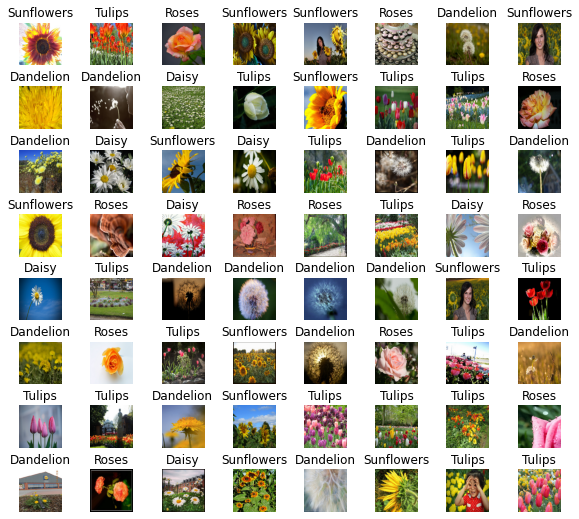

In [37]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(flowers_data_input_batch[n])
  #color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title())
  plt.axis('off')
